<!-- @q -->
## Problem 1 

Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns:

In [ ]:
import pandas as pd

df = pd.read_csv("2019_Yellow_Taxi_Trip_Data.csv")


cols = ["fare_amount", "tip_amount", "tolls_amount", "total_amount"]


print(f"first few rows of selected columns:")
print(df[cols].head(), "\n")

# calculate summary statistics
summary = df[cols].agg(["count", "min", "max", "mean", "median", "std"])

# roundoff summary values
summary = summary.round(2)

print("summary statistics table:")
print(summary)


first few rows of selected columns:
   fare_amount  tip_amount  tolls_amount  total_amount
0         29.5        7.98          6.12         47.90
1         10.5        0.00          0.00         12.30
2          9.5        2.00          0.00         15.80
3         13.0        4.32          0.00         21.62
4         10.5        0.50          0.00         15.30 

summary statistics table:
        fare_amount  tip_amount  tolls_amount  total_amount
count      10000.00    10000.00      10000.00      10000.00
min          -52.00        0.00         -6.12        -65.92
max          176.00       43.00        612.00        671.80
mean          15.11        2.63          0.62         22.56
median        10.00        2.00          0.00         16.30
std           13.95        3.41          6.44         19.21


<!-- @q -->
## Problem 2

Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`):

In [ ]:

# Finding the row with the maximum trip distance.
longest_trip = df.loc[df["trip_distance"].idxmax()]

# now selecting only the needed columns.
result = longest_trip[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]]

print("fare, tip, tolls, and total for the longest trip:")
print(result)


fare, tip, tolls, and total for the longest trip:
fare_amount      176.0
tip_amount       18.29
tolls_amount      6.12
total_amount    201.21
Name: 8338, dtype: object


<!-- @q -->
## Problem 3 

Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [93]:
meteor = pd.read_csv("Meteorite_Landings.csv")

# renaming 'mass(g)' to just 'mass'
meteor = meteor.rename(columns={"mass (g)": "mass"})

# droping the lat and long columns.
meteor = meteor.drop(columns=["reclat", "reclong"])

# sort by mass descending
meteor_sorted = meteor.sort_values(by="mass", ascending=False)

print("top rows after cleaning and sorting:")
print(meteor_sorted.head())

top rows after cleaning and sorting:
                  name     id nametype      recclass        mass   fall  \
16392             Hoba  11890    Valid     Iron, IVB  60000000.0  Found   
5373         Cape York   5262    Valid   Iron, IIIAB  58200000.0  Found   
5365   Campo del Cielo   5247    Valid  Iron, IAB-MG  50000000.0  Found   
5370     Canyon Diablo   5257    Valid  Iron, IAB-MG  30000000.0  Found   
3455           Armanty   2335    Valid    Iron, IIIE  28000000.0  Found   

                         year             GeoLocation  
16392  01/01/1920 12:00:00 AM   (-19.58333, 17.91667)  
5373   01/01/1818 12:00:00 AM   (76.13333, -64.93333)  
5365   12/22/1575 12:00:00 AM  (-27.46667, -60.58333)  
5370   01/01/1891 12:00:00 AM     (35.05, -111.03333)  
3455   01/01/1898 12:00:00 AM            (47.0, 88.0)  


<!-- @q -->
## Problem 4

Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

**Hint 1**: Use `year.str.slice()` to grab a substring.

**Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

In [ ]:
# 1: convert year value to datetime format and then extract just the year number.
# using errors="coerce" is safer because some year values start like 01/01/1880 and slicing gives 01/0 which pandas can't convert to int.
meteor["year"] = pd.to_datetime(meteor["year"], errors="coerce").dt.year

# 2: create a new column showing if year is before 1970
meteor["before_1970"] = meteor["year"] < 1970

print("preview of cleaned year + new column:")
print(meteor[["name", "year", "before_1970"]].head(), "\n")

# 3: set id as index
meteor = meteor.set_index("id")

# 4: sort index so loc[] can slice properly
meteor = meteor.sort_index()

# 5: extract rows between id 10036 and 10040
subset = meteor.loc[10036:10040]

print("meteorites with id between 10036 and 10040:")
print(subset)


preview of cleaned year + new column:
       name  year  before_1970
0    Aachen   NaN        False
1    Aarhus   NaN        False
2      Abee   NaN        False
3  Acapulco   NaN        False
4   Achiras   NaN        False 

meteorites with id between 10036 and 10040:
            name nametype         recclass      mass   fall  year  \
id                                                                  
10036     Enigma    Valid               H4      94.0  Found   NaN   
10037       Enon    Valid  Iron, ungrouped     763.0  Found   NaN   
10038      Enshi    Valid               H5    8000.0   Fell   NaN   
10039  Ensisheim    Valid              LL6  127000.0   Fell   NaN   

                 GeoLocation  before_1970  
id                                         
10036  (31.33333, -82.31667)        False  
10037     (39.86667, -83.95)        False  
10038          (30.3, 109.5)        False  
10039       (47.86667, 7.35)        False  


/tmp/ipykernel_1666/3239824644.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  meteor["year"] = pd.to_datetime(meteor["year"], errors="coerce").dt.year


**BONUS**: There's a data entry error in the `year` column. Can you find it?

In [ ]:
# Your code here
#the year column has full dates instead of just years, which causes wrong values. I fixed it using errors=coerce because some year values start like 01/01/1880 and slicing gives 01/0.

There's a meteorite that was reportedly found in the future:

_This meteorite actually was found in 2010 (more information [here](https://www.lpi.usra.edu/meteor/metbull.php?code=57150))._

<!-- @q -->
## Problem 5

Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [ ]:
#Reloading the file to start fresh as I lost output in second run and after research, it says due to indering the column is gone for second run.
import pandas as pd

df = pd.read_csv("2019_Yellow_Taxi_Trip_Data.csv", low_memory=False)

# 1: changing dropoff column into datetime format.
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

# 2: set it as index -> needed for resample
df = df.set_index("tpep_dropoff_datetime")

# 3: resample hourly and sum everything, then pick onlyneeded columns.
hourly = df.resample("H").sum()[["trip_distance", "fare_amount", "tolls_amount", "tip_amount"]]

# 4: find 5 hours with the most tips
top_5 = hourly.sort_values(by="tip_amount", ascending=False).head(5)

print("top 5 hours with highest total tips:")
print(top_5)


top 5 hours with highest total tips:
                       trip_distance  fare_amount  tolls_amount  tip_amount
tpep_dropoff_datetime                                                      
2019-10-23 16:00:00         10676.95     67797.76        699.04    12228.64
2019-10-23 17:00:00         16052.83     70131.91       4044.04    12044.03
2019-10-23 18:00:00          3104.56     11565.56       1454.67     1907.64
2019-10-23 15:00:00            14.34       213.50          0.00       51.75
2019-10-23 19:00:00            98.59       268.00         24.48       25.74


/tmp/ipykernel_1666/1485504619.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df.resample("H").sum()[["trip_distance", "fare_amount", "tolls_amount", "tip_amount"]]


<!-- @q -->
## Problem 6

Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

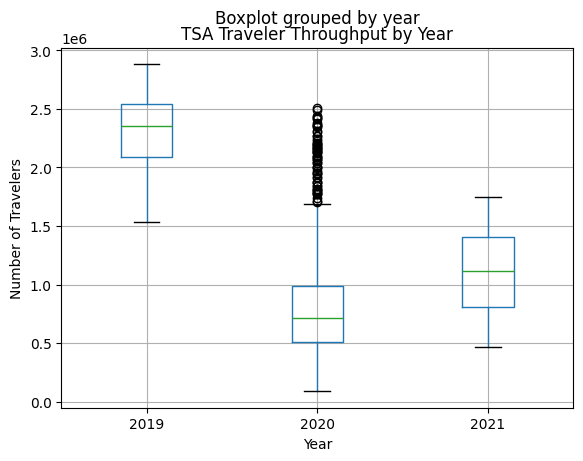

In [ ]:
import matplotlib.pyplot as plt
tsa = pd.read_csv("tsa_melted_holiday_travel.csv")

# make boxplots grouped by year
tsa.boxplot(column="travelers", by="year")

# add nice title and labels
plt.title("TSA Traveler by Year")
plt.xlabel("Year")
plt.ylabel("Number of Travelers")
plt.show()


<!-- @q -->
## Problem 7
Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

/tmp/ipykernel_1666/417029358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_2019["month"] = tsa_2019["date"].dt.month_name()
/tmp/ipykernel_1666/417029358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsa_2019["day"] = tsa_2019["date"].dt.day_name()


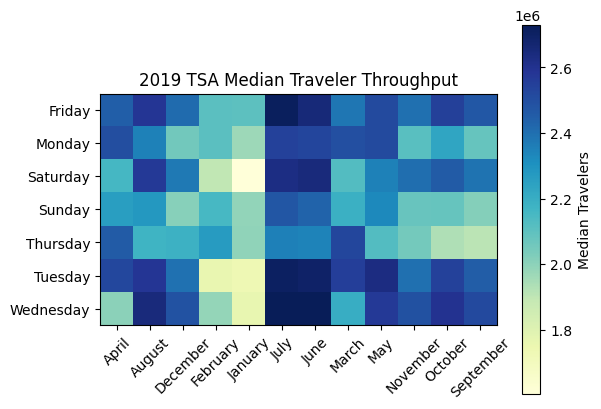

In [119]:
# make sure date is datetime
tsa["date"] = pd.to_datetime(tsa["date"])

# filter 2019 only
tsa_2019 = tsa[tsa["year"] == 2019]

# extract month and day of week
tsa_2019["month"] = tsa_2019["date"].dt.month_name()
tsa_2019["day"] = tsa_2019["date"].dt.day_name()

# compute median travelers by day and month
pivot = tsa_2019.pivot_table(index="day", columns="month", values="travelers", aggfunc="median")

# plot simple heatmap
plt.imshow(pivot, cmap="YlGnBu") 
# imshow() draws the heatmap grid from the pivot table, cmap="YlGnBu" sets colors 
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45) # xticks() adds month names on x-axis
plt.yticks(range(len(pivot.index)), pivot.index) # yticks() adds day names on y-axis
plt.colorbar(label="Median Travelers") 
plt.title("2019 TSA Median Traveler Throughput")
plt.show()
